Tarea: Proyecto I- Parte IV (Core)

Nombre: Luciano Benjamín Recalde Carballo


### Carga de Datos

Se cargan los datos

In [20]:
import pandas as pd
df = pd.read_csv('data/retail_sales_dataset3.csv')

# Resolución Parte IV

### Análisis Descriptivo y Visualización

#### Calcula estadísticas descriptivas básicas para comprender mejor las características de los datos.

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,1000.0,500.500000,288.819436,1.000000,250.750000,500.500000,750.250000,1000.000000
Age,1000.0,41.392000,13.681430,18.000000,29.000000,42.000000,53.000000,64.000000
Quantity,1000.0,2.514000,1.132734,1.000000,1.000000,3.000000,4.000000,4.000000
Price per Unit,1000.0,179.890000,189.681356,25.000000,30.000000,50.000000,300.000000,500.000000
Total Amount,1000.0,456.000000,559.997632,25.000000,60.000000,135.000000,900.000000,2000.000000
Calculated Total Amount,1000.0,456.000000,559.997632,25.000000,60.000000,135.000000,900.000000,2000.000000
Total Amount Stdev Difference,1000.0,496.319048,279.006281,40.002368,359.997632,469.997632,529.997632,1440.002368


#### Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.

##### Histogramas

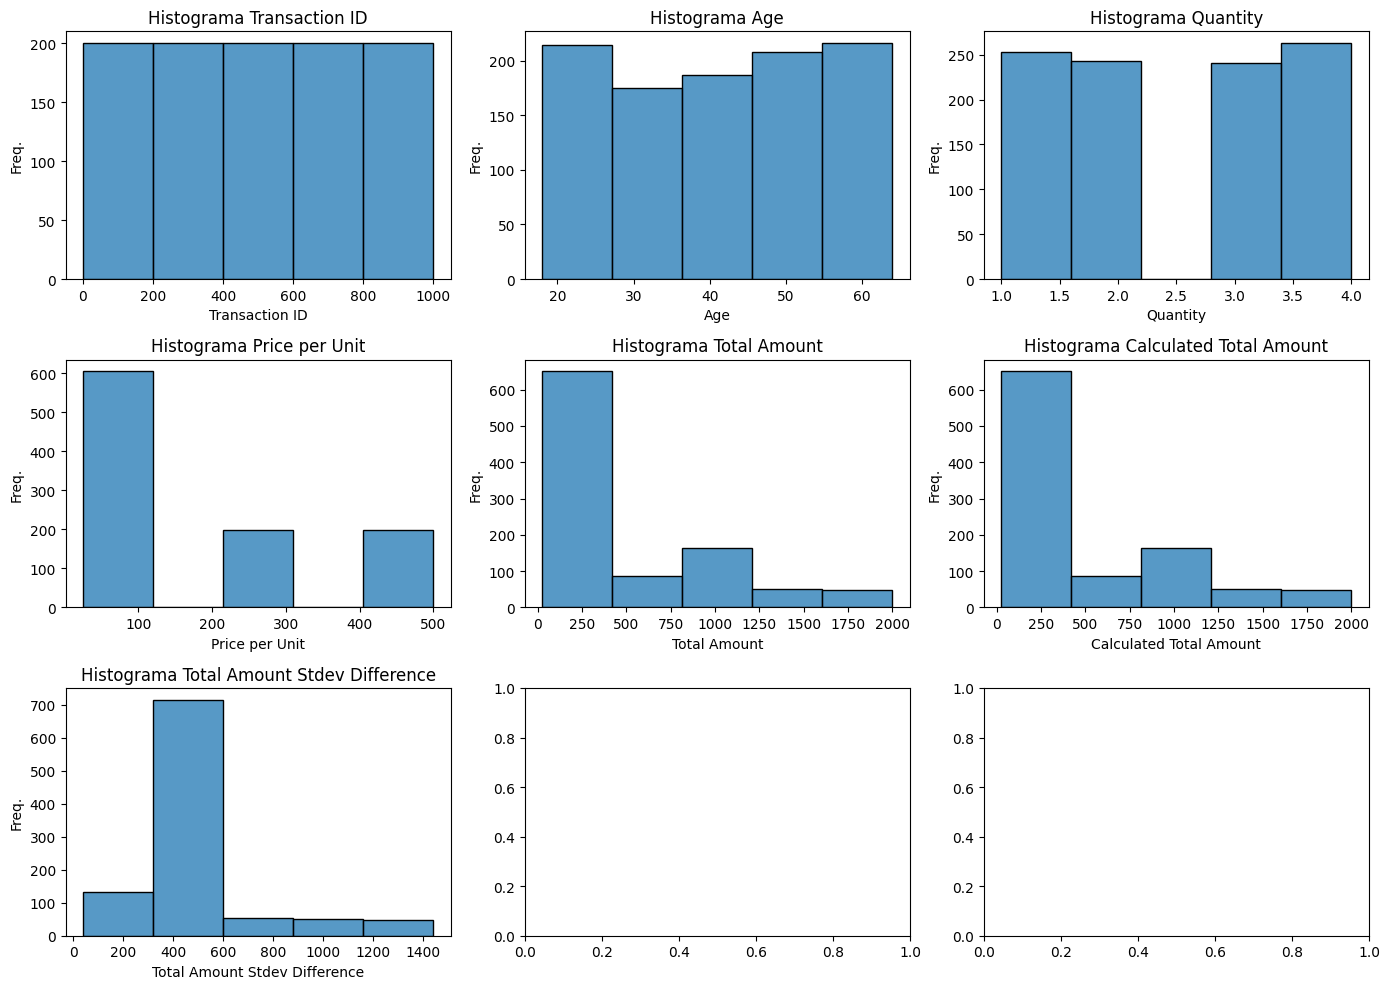

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

column_n = df.select_dtypes(include=[np.number]).columns.tolist()
row_n = int(len(column_n) / 3)
remanent = len(column_n) % 3

if remanent > 0:
    row_n += 1

_, axes = plt.subplots(nrows=row_n, ncols=3, figsize=(14, 10))

i_actual = 0
j_actual = 0

for columna in column_n:
    ax = axes[i_actual][j_actual]

    sns.histplot(df[columna], kde=False, bins=5, ax=ax)

    ax.set_title(f"Histograma {columna}")
    ax.set_xlabel(columna)
    ax.set_ylabel("Freq.")
    j_actual += 1

    if j_actual >= 3:
        i_actual += 1
        j_actual = 0
plt.tight_layout()
plt.show()

##### Boxplots

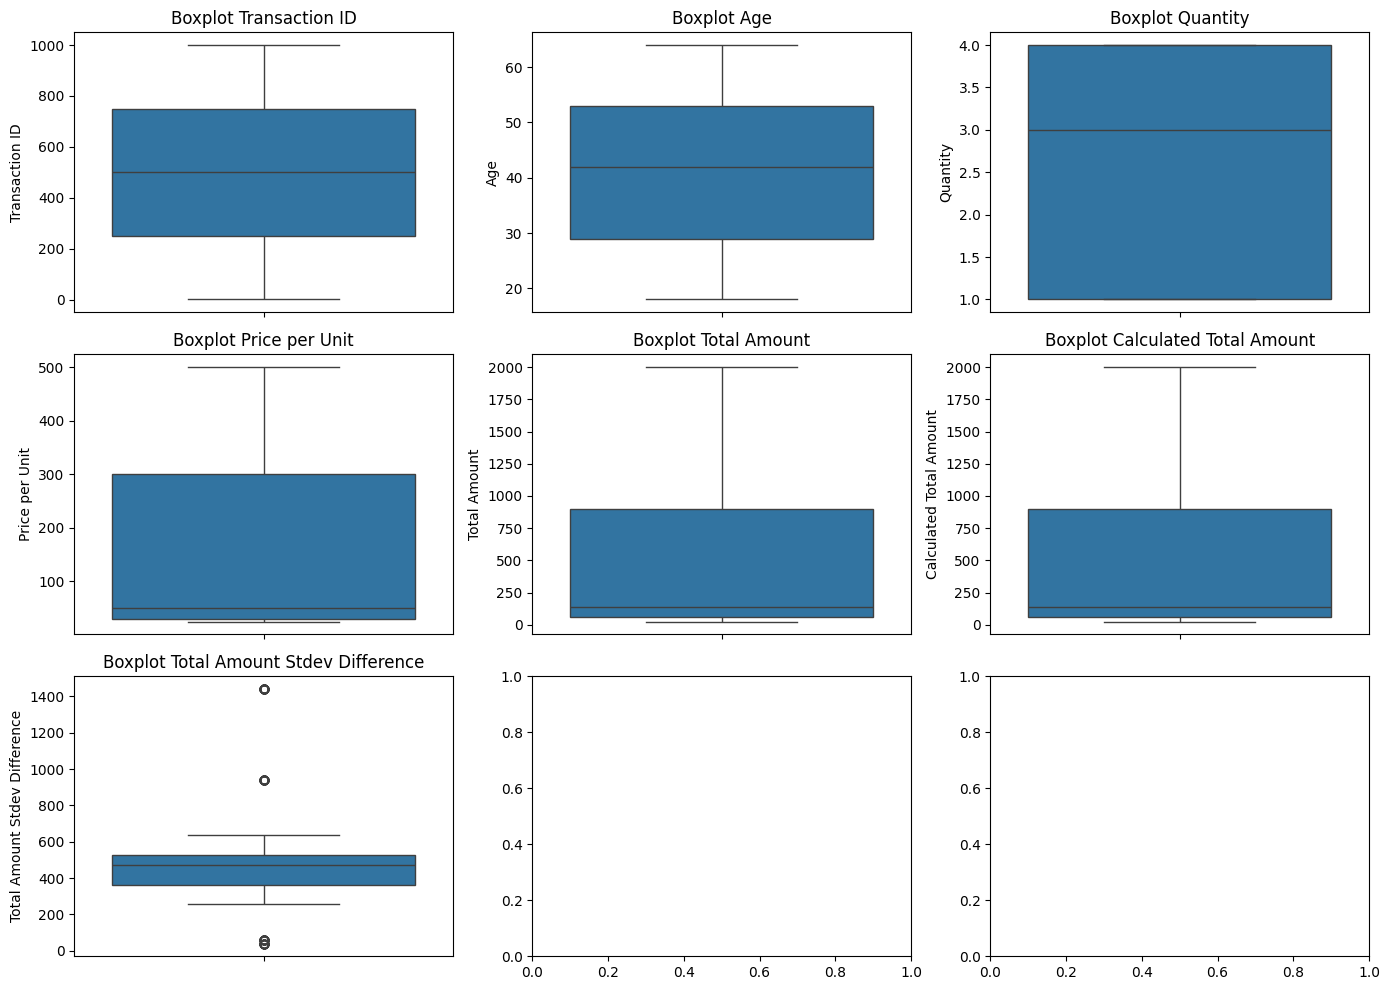

In [31]:
nro_filas = int(len(column_n) / 3)
remanente = len(column_n) % 3
if remanente > 0:
    nro_filas += 1
    fig, axes = plt.subplots(nrows=nro_filas, ncols=3, figsize=(14,10))
    i_actual = 0
    j_actual = 0
    for columna in column_n:
        ax = axes[i_actual][j_actual]
        sns.boxplot(df[columna], ax=ax)
        ax.set_title(f"Boxplot {columna}")
        j_actual += 1
        if j_actual >= 3:
            i_actual += 1
            j_actual = 0
    plt.tight_layout()
    plt.show()

#### Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.

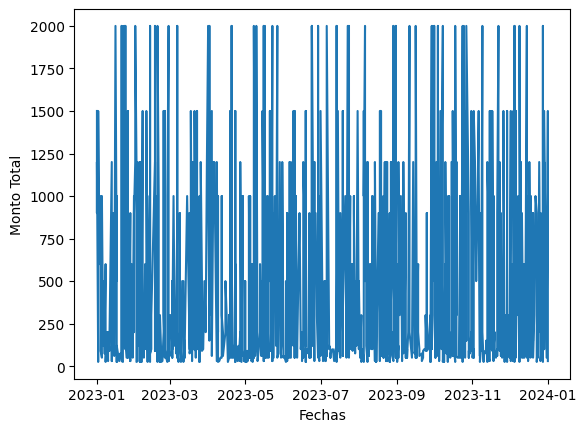

In [27]:
import matplotlib.pyplot as plt


df["Date"] = pd.to_datetime(df["Date"])

df.sort_values(by="Date", inplace=True)

tiempos = pd.to_datetime(df["Date"])
ventas = df["Total Amount"]

plt.plot(tiempos, ventas)
plt.xlabel("Fechas")
plt.ylabel("Monto Total")
plt.show()

Se puede notar que hay una distribución muy desigual de ventas por día. Por lo cual, sería interesante agrupar solo por fecha y ver la evolución de las ventas totales por día.

In [28]:
df_agrupado_suma_fechas = df.groupby("Date")["Total Amount"].sum("Total Amount").reset_index()
df_agrupado_suma_fechas

,Date,Total Amount
0,2023-01-01,3600
1,2023-01-02,1765
2,2023-01-03,600
3,2023-01-04,1240
4,2023-01-05,1100
...,...,...
340,2023-12-27,700
341,2023-12-28,2075
342,2023-12-29,3400
343,2023-12-31,50


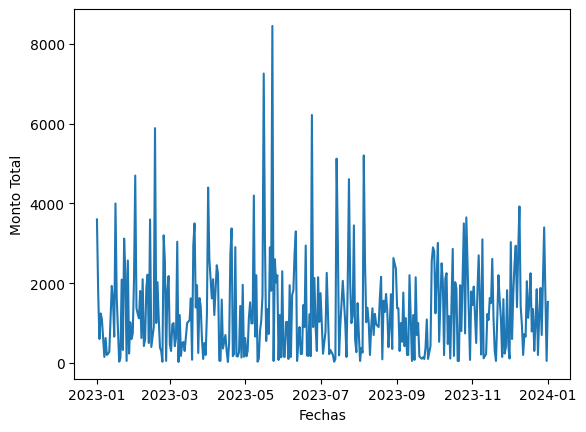

In [29]:
fechas = df_agrupado_suma_fechas["Date"]
cantidades = df_agrupado_suma_fechas["Total Amount"]
plt.plot(fechas, cantidades)
plt.xlabel("Fechas")
plt.ylabel("Monto Total")
plt.show()

##### Utiliza gráficos de dispersión para analizar la relación entre diferentes variables.

Gráfico de dispersión analizando Edad de cliente vs venta total

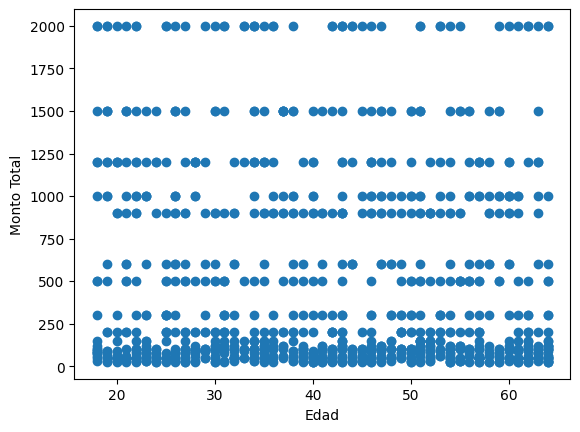

In [22]:
plt.scatter(df["Age"], df["Total Amount"])
plt.xlabel("Edad")
plt.ylabel("Monto Total")
plt.show()

Se observa que no existe mucha relacion entre el monto total y la edad del cliente

Ahora veremos la dispersión de la columna de precio por unidad vs cantidad adquirida.

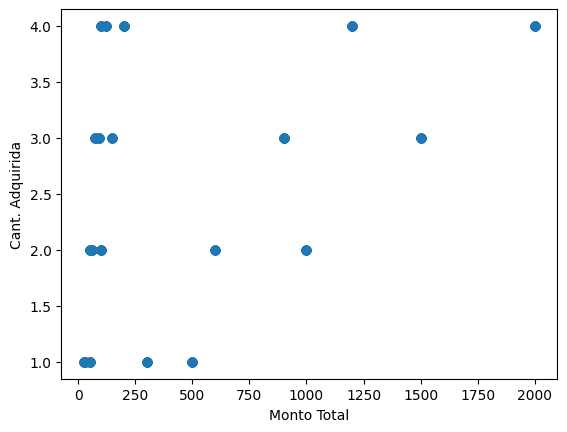

In [23]:
plt.scatter(df["Total Amount"], df["Quantity"])
plt.xlabel("Monto Total")
plt.ylabel("Cant. Adquirida")
plt.show()

Se observa que existen marcadas tendencias entre la cant adquirida y el monto total

##### Combina histogramas y boxplots para visualizar la distribución de las ventas y detectar valores atípicos.

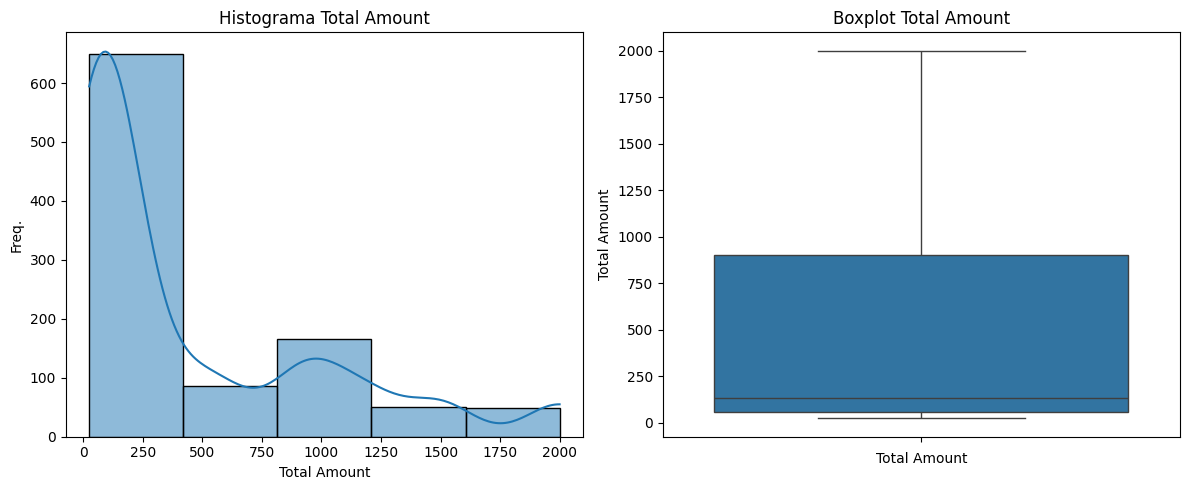

In [30]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.histplot(df["Total Amount"], kde=True, bins=5, ax=ax1)
ax1.set_title(f"Histograma Total Amount")
ax1.set_xlabel("Total Amount")
ax1.set_ylabel("Freq.")
sns.boxplot(df["Total Amount"], ax=ax2)
ax2.set_title(f"Boxplot Total Amount")
ax2.set_xlabel("Total Amount")
plt.tight_layout()
plt.show()

La mayor parte de las ventas se concentran entre un total de 0 a 1000 usd, siendo valores superiores no muy comunes.